# Carregamento da imagem e pré-processamento

In [1]:
# importando bibliotecas que iremos utilizar
import cv2
import matplotlib.pyplot as plt

In [220]:
# realizando leitura da imagem
imagem = cv2.imread('../Images/people1.png')


In [221]:
# exibindo shape da imagem (altura, largura e número de canais)
imagem.shape

(1024, 1536, 3)

In [222]:
# a imagem está com um tamnho grande, podemos diminuir para melhorar o processamento
# largura x altura
imagem = cv2.resize(imagem, (500, 300))

# exibindo o shape da imagem redimensionada (altura, largura e número de canais)
imagem.shape


(300, 500, 3)

In [1]:
# calculando o número de pixels da imagem
print(f"Número de pixels da imagem: {500*300*3}")

Número de pixels da imagem: 450000


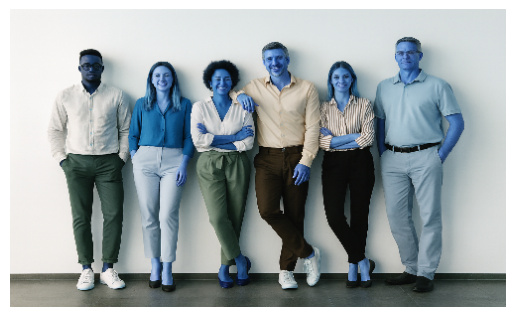

In [224]:
#exibindo imagem original (sem processamento)
plt.axis('off')
plt.imshow(imagem)
plt.show()

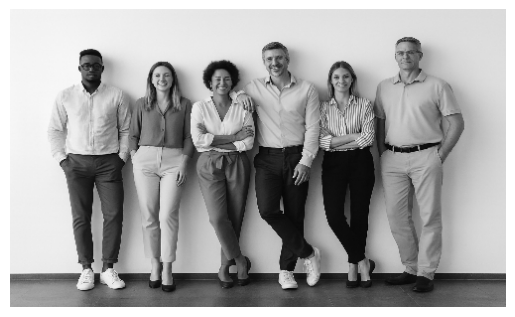

In [225]:
# procecssamento da imagem em tons de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

#exibindo imagem em tons de cinza (que iremos usar para fazer a detecção de faces)
imagem_cinza_plot = cv2.cvtColor(imagem_cinza, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imagem_cinza_plot)
plt.show()

In [226]:
#exibindo o shape da imagem em tons de cinza
imagem_cinza.shape
#é possível verificar que não há mais informação sobre o canal
# pois há apenas um valor

(300, 500)

In [2]:
# calculando número de pixels da imagem em tons de cinza
print(f"Número de pixels da imagem em tons de cinza: {300*500}")

Número de pixels da imagem em tons de cinza: 150000


# Detecção de faces

In [ ]:
# associa o objeto criado (detector_facial) com o arquivo XML para detecção de faces
detector_facial = cv2.CascadeClassifier('Cascades/haarcascade_frontalface_default.xml')

In [229]:
# obtém faces na imagem convertida em tons de cinza através do método detectMultiScale da classe CascadeClassifier
faces = detector_facial.detectMultiScale(imagem_cinza)

In [ ]:
# cada linha representa uma face detectada na imagem, nesse caso 5 faces foram detectadas
# os dois primeiros valores de uma linha, por exemplo, 254 e 40, indicam as posições X e Y onde a face inicia
# o terceiro e o quarto valor da linha indicam o tamanho da face, por exemplo, 27, 27, quer dizer que a face possui 26 pixels de largura e 26 pixels de altura

faces

array([[254,  40,  27,  27],
       [140,  57,  27,  27],
       [320,  58,  27,  27],
       [386,  33,  29,  29],
       [201,  60,  27,  27]], dtype=int32)

In [231]:
# obtém o número de linhas
len(faces)

5

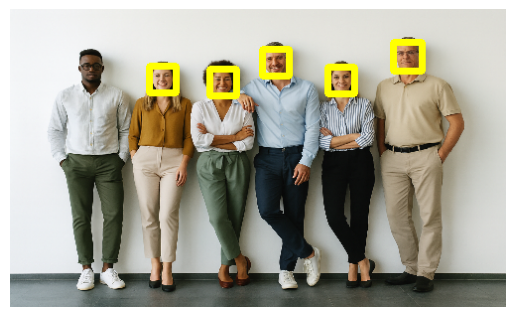

In [232]:
# exibindo imagem com as detecções na imagem colorida
for x, y, w, h in faces:
    #print(x, y, w, h)

    #desenha um retângulo nos pontos armazenados na variável faces
    cv2.rectangle(imagem, (x, y), (x+w, y+h), (0, 255, 255), 5)

#convertendo de BGR(OpenCV) para RGB(Matplotlib) para exibir no notebook e não em outra janela
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imagem_rgb)
plt.show()



# Ajuste de parâmetros - Exemplo 1

In [233]:
# Ajuste de parâmetros
imagem = cv2.imread('../Images/people1.png')



In [234]:
imagem.shape

(1024, 1536, 3)

In [235]:
imagem = cv2.resize(imagem, (500, 300))
imagem.shape

(300, 500, 3)

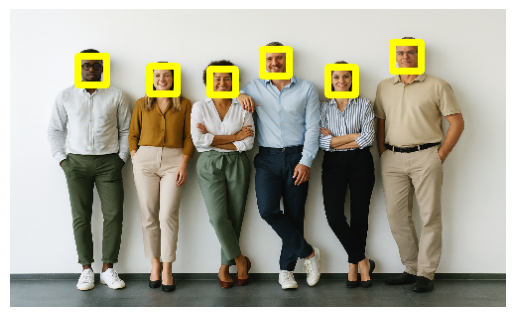

In [236]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

#alterando a escala da imagem para conseguir detectar todas as faces
faces = detector_facial.detectMultiScale(imagem_cinza, scaleFactor=1.15)

#obtém para cada uma das variáveis os valores (posição x, posição y, largura, altura)
for x, y, w, h in faces:
    #desenha um retângulo nos pontos identificados na imagem colorida
    cv2.rectangle(imagem, (x, y), (x+w, y+h), (0, 255, 255), 5)

#convertendo de BGR(OpenCV) para RGB(Matplotlib) para exibir no notebook e não em outra janela
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imagem_rgb)
plt.show()


# Ajuste de parâmetros - Exemplo 2

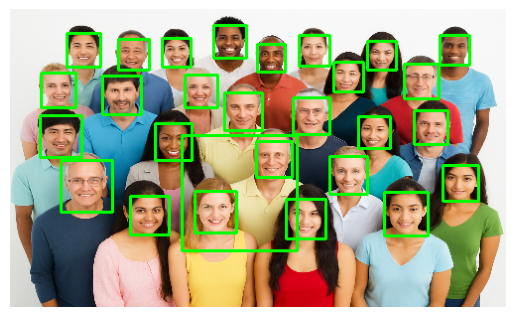

In [2]:
imagem2 = cv2.imread('../Images/people2.png')
imagem2 = cv2.resize(imagem2, (500, 300))
imagem2_cinza = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

detector_facial = cv2.CascadeClassifier('Cascades/haarcascade_frontalface_default.xml')
faces_imagem2 = detector_facial.detectMultiScale(imagem2_cinza)

for x, y, w, h in faces_imagem2:
    cv2.rectangle(imagem2, (x, y), (x+w, y+h), (0, 255, 0), 2)

imagem2_rgb = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imagem2_rgb)
plt.show()

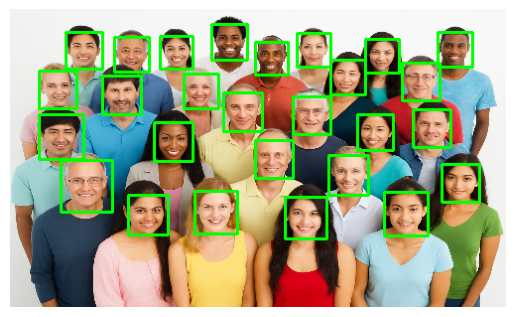

In [5]:
imagem2 = cv2.imread('../Images/people2.png')
imagem2 = cv2.resize(imagem2, (500, 300))
imagem2_cinza = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)

detector_facial = cv2.CascadeClassifier('Cascades/haarcascade_frontalface_default.xml')
faces_imagem2 = detector_facial.detectMultiScale(imagem2_cinza,  scaleFactor=1.1, minNeighbors=2, minSize=(30, 30), maxSize=(80, 80))

for x, y, w, h in faces_imagem2:
    cv2.rectangle(imagem2, (x, y), (x+w, y+h), (0, 255, 0), 2)

imagem2_rgb = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imagem2_rgb)
plt.show()


# Detecção de faces pela Webcam

In [ ]:
import cv2

face_detector =  cv2.CascadeClassifier('Cascades/haarcascade_frontalface_default.xml')

video_capture = cv2.VideoCapture(0)

while True:

    ret, frame = video_capture.read()

    image_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    detections = face_detector.detectMultiScale(image_grey, minNeighbors=5, minSize=(100, 100))

    for (x, y, w, h) in detections:
        print(w, h)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()


80 80
86 86
92 92
79 79
92 92
77 77
79 79
86 86
79 79
77 77
88 88
89 89
78 78
91 91
82 82
81 81
78 78
85 85
89 89
79 79
87 87
82 82
77 77
94 94
86 86
83 83
86 86
78 78
86 86
83 83
79 79
86 86
77 77
81 81
86 86
77 77
81 81
80 80
87 87
81 81
89 89
89 89
83 83
87 87
80 80
85 85
90 90
79 79
87 87
79 79
90 90
86 86
78 78
89 89
93 93
80 80
87 87
79 79
90 90
84 84
79 79
86 86
78 78
81 81
88 88
78 78
86 86
77 77
88 88
87 87
78 78
92 92
83 83
77 77
77 77
89 89
83 83
86 86
78 78
81 81
94 94
80 80
94 94
81 81
90 90
79 79
89 89
84 84
147 147
80 80
93 93
78 78
81 81
79 79
93 93
75 75
94 94
88 88
92 92
76 76
88 88
140 140
88 88
83 83
79 79
89 89
84 84
148 148
90 90
77 77
83 83
91 91
85 85
91 91
84 84
90 90
85 85
90 90
81 81
92 92
77 77
93 93
114 114
90 90
88 88
130 130
91 91
87 87
92 92
79 79
124 124
94 94
92 92
81 81
91 91
92 92
88 88
93 93
91 91
83 83
89 89
93 93
91 91
90 90
89 89
81 81
86 86
147 147
91 91
88 88
91 91
90 90
91 91
79 79
89 89
147 147
91 91
90 90
98 98
92 92
107 107
91 91
92 92
115 